<b><p style="font-family:verdana;text-align:center;font-size:24px;line-height:140%">Deep Neural Network for Classification of Breast Cancer Type based on Cellular Nuclei Features</p></b>
<br>
<b><p style="font-family:times;text-align:center;font-size:18px;line-height:130%">Tirthajyoti Sarkar, Ph.D.<br>Sr. Principal Engineer, ON Semiconductor, Sunnyvale, CA<br>Email: tirthajyoti@gmail.com</p></b>

<p style="font-family:times;text-align:center;font-size:18px">Term paper submitted in the Stanford Continuing Education SCI-52 class:<br> <i>Artificial Intelligence: An Introduction to Neural Networks and Deep Learning</i></p>

<p style="font-family:courier;text-align:justified;">
<b><i>Abstract</i></b>: In this paper, we discuss the use of a densely-connected 2-layer(hidden) neural network for the classification task of breast cancer malignancy type from the Wisconsin cancer research center's dataset. In this dataset, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Basic exploratory data analysis and visualization are done followed by building 2-layer neural network (using Keras framework in Python with a TensorFlow backend). Suitable classification matrices are computed from the test results and importance of data preprocessing/scaling for deep learning is demonstrated</p>

<p style="font-family:courier;text-align:justified;">
<b><i>Keywords</i></b>: Deep learning, Cancer, Classification, Neural network, scaling, Confusion matrix, F1 score
</p>

<b><p style="font-family:times;text-align:center;font-size:20px">Introduction</p></b>
<span style="font-family:times;text-align:justified;font-size:15px">
<p>Andrew Ng said _"Artificial Intelligence (AI) is the new electricity"_. If that is the case, then undoubtedly, Deep Neural Networks (DNN) are the new oil for the modern engine of this electricity generator. The basic idea—that software can approximately emulate the collective behavior and firing patterns of neocortex’s large array of neurons in an artificial “neural network”—is decades old, and it has led to as many disappointments as breakthroughs. But because of improvements in mathematical formulas and increasingly powerful computers, computer scientists can now model many more layers of virtual neurons than ever before.</p>
<p>
    Inventors have long dreamed of creating machines that think. This desire dates back to at least the time of ancient Greece. When programmable computers were ﬁrst conceived, people wondered whether such machines might become intelligent, over a hundred years before one was even built. Today, AI is a thriving ﬁeld with many practical applications and active research topics. We look to intelligent software to automate routine labor, understand speech or images, make diagnoses in medicine and support basic scientiﬁc research.</p>
<p>
    Deep learning (DL) has, in recent years, accelerated AI research and innovation, to a break taking pace. In some way, it is not a brand new technology - at its core it is a resurgent form of the old <b><i>multi-layer perceptrons</b></i>, as advanced by the likes of <b>Marvin Minsky, John McCarthy, Frank Rosenblatt, Alexey Ivakhnenko, V.G. Lapa,</b> in 1950s and 60s. However, new algorithms, advanced graphics-processing-unit (GPU), innovative data engineering, and massive trove of Big Data, have enabled it to emerge as the leader among all machine learning techniques that have the potential of creating a truly ‘intelligent machine’ in near future.</p>
<p>
    In this article, we show how to model and use a simple 2-hidden-layer neural network to predict the class of breast cancer from the measurements of tumor images and their descriptive statistics. We use the famous Wisconsin Cancer dataset for this purpose which can be downloaded from University of California, Irvine Machine Learning repository. The model shows high _accuracy, precison, recall_, and _F1 score_ when the data is properly preprocessed and the model is trained for sufficient number of epochs.</p>
</span>
<b><p style="font-family:times;text-align:center;font-size:20px">The Dataset: Features and exploratory analysis </p></b><br>
<span style="font-family:times;text-align:justified;font-size:15px">
    <p>This particular data set was created by imaging breast cancer fluid nuclei from patients in a simple outpatient procedure. First, a sample of fluid is taken from patient’s breast. This procedure involves using a small-gauge needle to take the fluid, known as <b>fine-needle-aspirate (FNA)</b>, directly from a breast lump or mass, the lump having been previously detected by self-examination or mammography. The fluid from the FNA is placed on a glass slide and sainted to highlight the nuclei of the constituent cells. An image from the FNA is transferred to a workstation by a video camera mounted on a microscope. An in-house program called <b>Xcyt</b>, uses curve-fitting techniques to determine the boundaries and geometric properties of the nuclei. Ten features are computer for each nucleus: 
* area, 
* radius, 
* perimeter, 
* symmetry, 
* number and size of concavities, 
* fractal dimension of the boundary, 
* compactness, 
* smoothness (local variation of radial segments), and 
* texture (variance of gray level inside the boundary).

The mean value, extreme value, and standard error of each of these cellular features are also computed resulting in <b>30 real-valued features for each image.</b> In the public dataset, 569 such images are available. The data set can be downloaded from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29"> UCI ML repo</a>. However, this data set is also readily available from Python's <b>Scikit-Learn machine learning library</b> utility tools and we use one simple command to import the dataset into our program.</p>
</span>

### Import necessary Python packages and methods

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Import the data set using scikit-learn's utility function

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Create a Pandas DataFrame from the raw data

In [57]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

### Append the 'target' i.e. response variable to the Data Frame and show few examples

In [58]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head(5).transpose()[:10]

,0,1,2,3,4
mean radius,17.99000,20.57000,19.69000,11.42000,20.29000
mean texture,10.38000,17.77000,21.25000,20.38000,14.34000
mean perimeter,122.80000,132.90000,130.00000,77.58000,135.10000
mean area,1001.00000,1326.00000,1203.00000,386.10000,1297.00000
mean smoothness,0.11840,0.08474,0.10960,0.14250,0.10030
mean compactness,0.27760,0.07864,0.15990,0.28390,0.13280
mean concavity,0.30010,0.08690,0.19740,0.24140,0.19800
mean concave points,0.14710,0.07017,0.12790,0.10520,0.10430
mean symmetry,0.24190,0.18120,0.20690,0.25970,0.18090
mean fractal dimension,0.07871,0.05667,0.05999,0.09744,0.05883


### Visualizations - _is there linear seperability_?
<p style="font-family:times;text-align:justified;font-size:15px">
Exploratory analysis with visualizations is always a good place to start any machine learning task. We create some pairwise scatter plots with cancer type (benign or malignant) marked by color. Dark color points denote malignant cancer cases and light color ones denote benign cases. It is noted that the <b>points are not very well separated or linearly separated by these measurement features</b> i.e. simple linear clasifier will not be able to diagnose malignant and benign cases with high accuracy based on the image measurements.</p>  

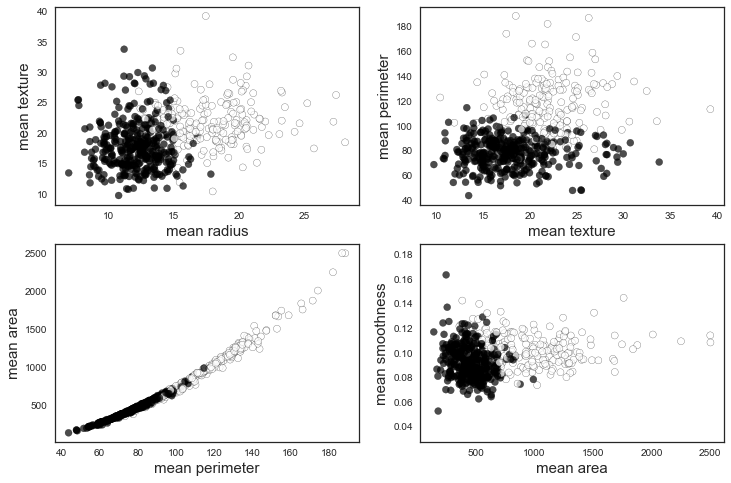

In [59]:
plt.figure(figsize=(12,8))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.scatter(df[df.columns[i-1]],df[df.columns[i]],
                edgecolor='k',alpha=0.7,c=df['Cancer'])
    plt.xlabel(df.columns[i-1],fontsize=15)
    plt.ylabel(df.columns[i],fontsize=15)

plt.show()

### Distributions of the features
<p style="font-family:times;text-align:justified;font-size:15px">
We plot the distributions/histograms of some of the features. Most of them are either left- or right-skewed.</p>  

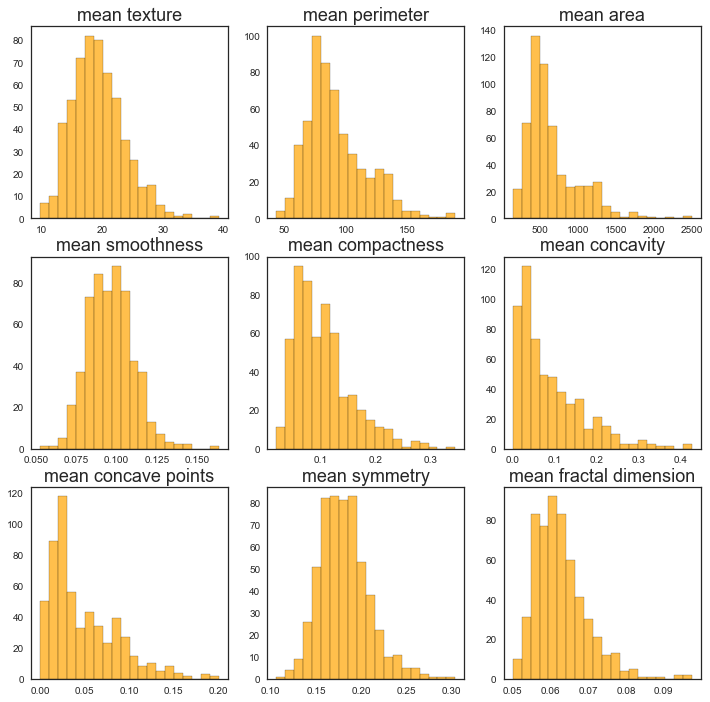

In [72]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,12))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.title(df.columns[i],fontsize=18)
    plt.hist(df[df.columns[i]],color='orange',edgecolor='k',alpha=0.7,bins=20)

<b><p style="font-family:times;text-align:center;font-size:20px">The Dataset: Preprocessing </p></b>
<p style="font-family:times;text-align:justified;font-size:15px">
    In statistics and machine learning we usually split our data into to subsets: <b>training data</b> and <b>testing data</b> (and sometimes to three: <b>train, validate and test</b>), and fit our model on the train data, in order to make predictions on the test data. This is a mandatory step to avoid overfitting our data i.e. model fits to noise in the data rather than to the hidden pattern. <b>Test data should never be seen by the model except at the time of final test.</b> Validation set can be used to fine tune the hyperparameters of the model.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
    We choose a test fraction of 0.3 i.e. 30% and equally divide the rest of the data into traing set and validation set. We use Scikit-Learn's `train_test_split` function to create this random split.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
    We create multi-dimensional vectors (Python <span style="background-color:#d1e0e0;font-family:courier">Numpy</span> objects) from the Dataset to feed properly to the neural network model later - <span style="background-color:#d1e0e0;font-family:courier">feature</span> and <span style="background-color:#d1e0e0;font-family:courier">response</span> vectors. We also scale this data using Scikit-Learn's <span style="background-color:#d1e0e0;font-family:courier">preprocessing.scale()</span> function. This scales the data by dividing each data point by the range of that series (difference between the max and min).</p>

### Create features and response vectors

In [61]:
X=df.drop(['Cancer'],axis=1)
y=df['Cancer']

### Preprocessing - scaling the data

In [62]:
X=preprocessing.scale(X)

### Train/Test/Validation set split

In [63]:
test_frac=0.3
val_frac=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_frac)
input_dim=X.shape[1]

<b><p style="font-family:times;text-align:center;font-size:20px">Classification with the Neural Network</p></b>
<p style="font-family:times;text-align:justified;font-size:15px">
We use <a href="https://keras.io/">Keras framework</a> to model our neural network. Keras is an open source neural network modeling library written in Python. It is capable of running on top of <a href="https://www.tensorflow.org/">TensorFlow</a>, Microsoft Cognitive Toolkit or Theano. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System), and its primary author and maintainer is François Chollet, a Google engineer.</p>

### Importing Keras package and utilities

In [64]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Model Hyperparameters
<p style="font-family:times;text-align:justified;font-size:15px">
Hyperparameters are the variables which determines the network structure (e.g: <b>number of layers</b> and <b>number of hidden units</b>) and the variables which determine how the network is trained(e.g. <b>learning rate</b>). Hyperparameters are set before training(before optimizing the weights and bias). For the first pass, we choose 5 neurons in the first layer and 3 neurons in the second layer.</p>
<img src="https://raw.githubusercontent.com/tirthajyoti/tirthajyoti.github.io/master/Images/DNN_5_3.PNG" style="width:500px;height:300px;">
<p style="font-family:times;text-align:justified;font-size:15px">
The <b>learning rate</b> defines how quickly a network updates its parameters. Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge. Usually a decaying Learning rate is preferred.</p>
<img src="https://cdn-images-1.medium.com/max/1000/0*FA9UmDXdzYzuOpeO.jpg" style="width:400px;height:300px;">
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Activation functions</b> are used to introduce nonlinearity to models, which allows deep learning models to learn nonlinear prediction boundaries. Generally, the rectified linear activation (or <b><i>ReLU</b></i>) function is the most popular. They basically decide whether a neuron should be activated or not. Whether the information that the neuron is receiving is relevant for the given information or should it be ignored. <b><i>Sigmoid</b></i> is used in the output layer while making binary predictions. <b><i>Softmax</b></i> is used in the output layer while making multi-class predictions.</p>
<img src="https://raw.githubusercontent.com/tirthajyoti/tirthajyoti.github.io/master/Images/Sigmoid1.PNG" style="width:400px;height:300px;">
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Dropout</b> is a regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power. Basically, during back-propagation, the model drops/eliminates randomly a certain percentage of connections - the percentage being equal to the dropout rate. Generally, use a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network.</p>
<img src="https://raw.githubusercontent.com/tirthajyoti/tirthajyoti.github.io/master/Images/Dropout.PNG" style="width:400px;height:250px;">

In [27]:
neurons=[5,3]
dropout_prob=0.25
learning_rate=1e-3
activation_func='relu'

### Model architecture code

In [28]:
model = Sequential()
model.add(Dense(neurons[0], input_shape=(input_dim,),activation=activation_func))
model.add(Dropout(dropout_prob))
if len(neurons)>1:    
    for n in neurons[1:]:
        model.add(Dense(n,activation=activation_func))
        model.add(Dropout(dropout_prob))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 155       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
dropout_4 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


### Optimizer and Error Function
<p style="font-family:times;text-align:justified;font-size:15px">
The standard gradient descent algorithm updates the parameters $\Theta$ of the objective $J(\Theta)$ as,</p>
<p style="text-align:center">$\Theta =\Theta -\alpha \triangledown_{\Theta} E[J(\Theta)]$</p>
<p style="font-family:times;text-align:justified;font-size:15px">
where the expectation in the above equation is approximated by evaluating the cost and gradient over the full training set. <a href="http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/"> Stochastic Gradient Descent (SGD)</a> simply does away with the expectation in the update and computes the gradient of the parameters using only a single or a few training examples. The new update is given by,</p>
<p style="text-align:center">$\Theta =\Theta -\alpha \triangledown_{\Theta}J(\Theta;x^{(i)},y^{(i)})]$</p>
<p style="font-family:times;text-align:justified;font-size:15px">
with a pair $(x^{(i)},y^{(i)})$ from the training set.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
Generally each parameter update in SGD is computed w.r.t a few training examples or a <b>minibatch</b> as opposed to a single example. The reason for this is twofold: first this <b>reduces the variance in the parameter update</b> and can lead to more stable convergence, second this allows the computation to <b>take advantage of highly optimized matrix operations</b> that should be used in a well vectorized computation of the cost and gradient.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
We use <b>binary cross-entropy error function</b> for this learning task. It is given by,</p>
<p style="text-align:center">$\mathit{L(y,p)}=-(y.\text{log}(p)+(1-y).\text{log}(1-p))$</p>

In [29]:
optimizer=keras.optimizers.sgd(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

### Epochs and Batch size
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Number of epochs</b> is the number of times the whole training data is shown to the network while training. Basically, it is one forward pass through the network to calculate the outputs (or output probabilities) and one back-propagation to adjust the weights based on the errors and their propagataed derivatives. Increase the number of epochs until the validation accuracy starts decreasing even when training accuracy is increasing(overfitting). We initially run the network for <b>50 epochs</b>.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Mini batch size</b> is the number of sub samples given to the network after which parameter update happens. A common choice for batch size is 16 or 32, but since we are not dealing with many data here, we choose <b>batch size of 5</b>.</p>

In [30]:
num_epochs=20
batch_size=5

### Running the model i.e. fitting training data

In [31]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
                 validation_data=(X_val, y_val), verbose=0, shuffle=False)

### Plotting the validation set loss and accuracy

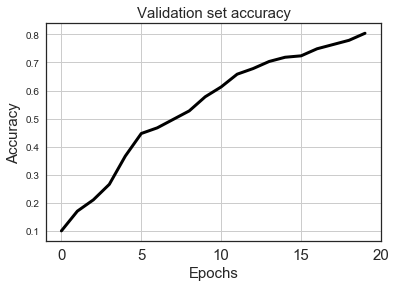

In [32]:
sns.set_style(style='white')
plt.plot(hist.history['val_acc'],color='k',lw=3)
plt.title("Validation set accuracy",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.xticks([i for i in range(0,num_epochs+1,5)],fontsize=15)
plt.show()

<b><p style="font-family:times;text-align:center;font-size:20px">Checking the quality of the model</p></b>
### Confusion Matrix
<p style="font-family:times;text-align:justified;font-size:15px">
A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model
is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made. It is this breakdown that overcomes the limitation of using classification accuracy alone.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
    We use <span style="background-color:#d1e0e0;font-family:courier">confusion_matrix</span> method from <span style="background-color:#d1e0e0;font-family:courier">sklearn.metrics</span> class of the Scikit-Learn package in this paper. We first use the <span style="background-color:#d1e0e0;font-family:courier">hist.model.predict</span> function to predict the breast cancer types (classes 0 or 1) by passing along the test data set <span style="background-color:#d1e0e0;font-family:courier">X_test</span>. This output predictions are real valued probability numbers as the output of the sigmoid activation function of our output layer. Thereafter, we use <span style="background-color:#d1e0e0;font-family:courier">binarize</span> method from <span style="background-color:#d1e0e0;font-family:courier">sklearn.preprocessing</span> class of Scikit-Learn to convert those probability values to binary outputs - <span style="background-color:#d1e0e0;font-family:courier">y_pred</span>. Finally, we compare the Ground Truth i.e. <span style="background-color:#d1e0e0;font-family:courier">y_test</span> with <span style="background-color:#d1e0e0;font-family:courier">y_pred</span> to calculate <i>True Positive, False Positive, True Negative</i>, and <i>False Negative</i> and construct the Confusion Matrix.</p>
<p></p>
<span style="font-family:times;text-align:justified;font-size:15px">
<li><b>True Positives (TP)</b> - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.</li>
<li><b>True Negatives (TN)</b> - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.</li>
<li><b>False Positives (FP)</b> – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.</li>
<li><b>False Negatives (FN)</b> – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.</li>

In [33]:
y_pred=hist.model.predict(X_test)
y_pred=binarize(y_pred,0.5)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(data=cm,columns=['Predicted: YES','Predicted: NO'],index=['Actual: YES','Actual: NO'])
cm_df

,Predicted: YES,Predicted: NO
Actual: YES,48,3
Actual: NO,36,84


### Classification report with _F1 score_
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Precision</b> is the number of True Positives divided by the number of True Positives and False Positives. Put another way, it is the number of positive predictions divided by the total number of positive class values predicted. Precision can be thought of as a measure of a classifiers exactness.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
<b>Recall</b> is the number of True Positives divided by the number of True Positives and the number of False Negatives. Put another way it is the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity. Recall can be thought of as a measure of a classifiers completeness.</p>
<p style="font-family:times;text-align:justified;font-size:15px">
<b>The F1 score</b> is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. Put another way, the F1 score conveys the balance between the precision and the recall.

In [34]:
predictions = hist.model.predict(X_test)
predictions=binarize(predictions,0.5)
class_report = classification_report(y_test,predictions)
print(class_report)

             precision    recall  f1-score   support

          0       0.57      0.94      0.71        51
          1       0.97      0.70      0.81       120

avg / total       0.85      0.77      0.78       171



<b><p style="font-family:times;text-align:center;font-size:20px">Impact of the network hyperparameters on the classification quality</p></b>
<p style="font-family:times;text-align:justified;font-size:15px">
We further studieed the impact of Hyperparameters of the neural network model on the F1 score. Learning rate and number of neurons (simulteneously in both layers) were varied over a wide range and the classification quality was measured. As expected, a slight increase of F1 score was observed with learning rate and a large change in F1 score was seen when number of neurons was increased from 1 to 15.
</p>

### Code to compute and plot F1 score as a function of learning rate

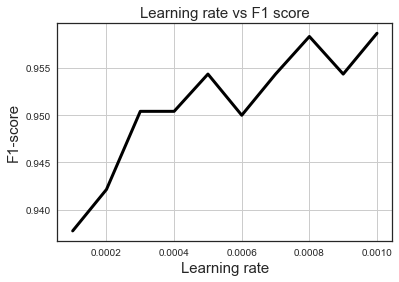

In [44]:
from sklearn.metrics import f1_score
lr_lst= [1e-4*i for i in range(1,11)]
f1_score_lst=[]
num_epochs=10
for lr in lr_lst:
    optimizer=keras.optimizers.sgd(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,validation_data=(X_val, y_val), 
              verbose=0, shuffle=False)
    predictions = hist.model.predict(X_test)
    predictions=binarize(predictions,0.5)
    f1score=f1_score(y_test,predictions)
    f1_score_lst.append(f1score)
    
plt.plot(lr_lst,f1_score_lst,color='k',lw=3)
plt.title("Learning rate vs F1 score",fontsize=15)
plt.grid(True)
plt.xlabel("Learning rate",fontsize=15)
plt.ylabel("F1-score",fontsize=15)
#plt.xticks([i for i in range(0,num_epochs+1,5)],fontsize=15)
plt.show()

### Code to compute and plot F1 score as a function of number of neurons in the hidden layers

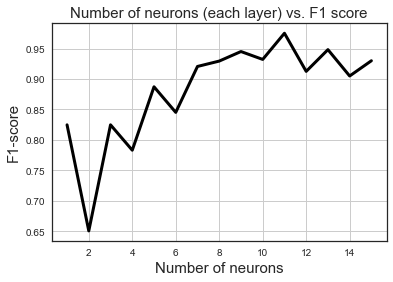

In [43]:
neuron_lst= [i for i in range(1,16)]
f1_score_lst=[]

dropout_prob=0.25
learning_rate=1e-3
activation_func='relu'
num_epochs=20
batch_size=4

for neuron in neuron_lst:
    model = Sequential()
    model.add(Dense(neuron,input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron,activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(1,activation='sigmoid'))

    optimizer=keras.optimizers.sgd(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
                     validation_data=(X_val, y_val),verbose=0, shuffle=False)
    
    predictions = hist.model.predict(X_test)
    predictions=binarize(predictions,0.5)
    f1score=f1_score(y_test,predictions)
    f1_score_lst.append(f1score)

plt.plot(neuron_lst,f1_score_lst,color='k',lw=3)
plt.title("Number of neurons (each layer) vs. F1 score",fontsize=15)
plt.grid(True)
plt.xlabel("Number of neurons",fontsize=15)
plt.ylabel("F1-score",fontsize=15)
#plt.xticks([i for i in range(0,num_epochs+1,5)],fontsize=15)
plt.show()

<b><p style="font-family:times;text-align:center;font-size:20px">Summary and Conclusion</p></b>
<span style="font-family:times;text-align:justified;font-size:15px">
<p>In this article, we discussed the basics of a densely-connected neural network and applied the model to the task of classification of breast cancer type (benign or malignant) based on ten geometric features (and their summary statistics) extracted from the images of cellular nuclei. In general, the model shows good accuracy, precision/recall and F1 score. We further studied the impact of some hyperparameters such as learning rate and number of neurons on the classification quality (F1 score). F1 score exhibited a positive trend with these hyperparaeters.</p>
<p>
Although conventional neural networks (CNN) have shown near-human level (or better) performance in recnet years for direct image classification tasks, and they have been applied quite successfully for medical diagnostic applications (e.g. skin cancer detection), classification/diagnosis based on simple geometric features, extracted from cellular images, remain an interesting area of study. A simple 2-layer neural network could classify breast cancer type with high degree of accuracy and precision/recall based on these extracted features and their summary statistics. This approach does not need nearly as much computing power as demanded by large and complex CNNs. Therefore, it can be asserted that a machine learning pipeline consisting of a front-end geometric feature extraction program followed by a densely-connected neural network remains a viable alternative to much more complex CNN models for medical diagnostic applications</p>